<a href="https://colab.research.google.com/github/PongsakornChuneyoo/hello-world/blob/master/test7XML%2CPascal_VOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall -y imgaug && pip uninstall -y albumentations && pip install imgaug==0.4
!git clone -b legacy-yolov2 https://github.com/AIWintermuteAI/aXeleRate.git
import sys
sys.path.append('/content/aXeleRate')
from axelerate import setup_training, setup_inference

Found existing installation: imgaug 0.4.0
Uninstalling imgaug-0.4.0:
  Successfully uninstalled imgaug-0.4.0
Found existing installation: albumentations 1.2.1
Uninstalling albumentations-1.2.1:
  Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 5.1 MB/s 
Cloning into 'aXeleRate'...
remote: Enumerating objects: 2404, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 2404 (delta 201), reused 178 (delta 176), pack-reused 2179
Receiving objects: 100% (2404/2404), 9.66 MiB | 28.58 MiB/s, done.
Resolving deltas: 100% (1577/1577), done.


In [ ]:
%matplotlib inline
!gdown https://drive.google.com/uc?id=1L-k_6MiZb4wDUaht_5iVCefJbcY7-ox_  #pascal-voc dataset 

!unzip --qq JPEGImages.zip # unzip ไฟล์ ในไฟล์ตัวอย่างจะชื่อ JPEGImages.zip ซึ่งเป็นไฟที่ได้โหลดมาจากไดร์

Downloading...
From: https://drive.google.com/uc?id=1L-k_6MiZb4wDUaht_5iVCefJbcY7-ox_
To: /content/JPEGImages.zip
100% 10.5M/10.5M [00:02<00:00, 5.01MB/s]


In [ ]:
%matplotlib inline
!gdown https://drive.google.com/uc?id=16kU-cbm2tM8C1hHneuRWEfq2Gr0XP1es  #pascal-voc dataset 

!unzip --qq Annotations.zip # unzip ไฟล์ ในไฟล์ตัวอย่างจะชื่อ Annotations.zip ซึ่งเป็นไฟที่ได้โหลดมาจากไดร์

Downloading...
From: https://drive.google.com/uc?id=16kU-cbm2tM8C1hHneuRWEfq2Gr0XP1es
To: /content/Annotations.zip
100% 581k/581k [00:00<00:00, 87.5MB/s]


/usr/local/lib/python3.7/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


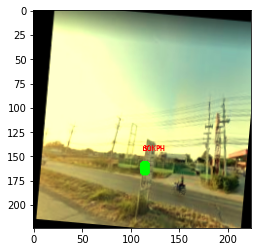

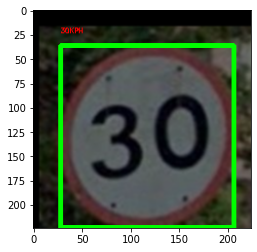

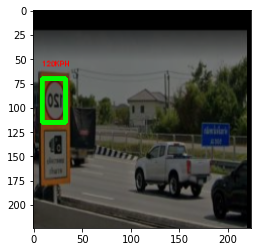

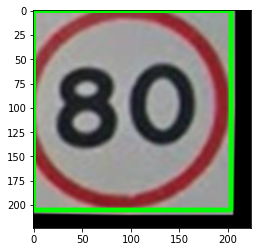

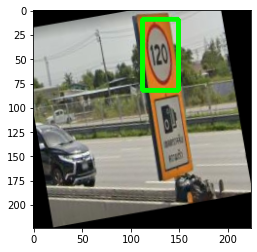

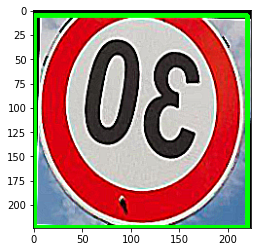

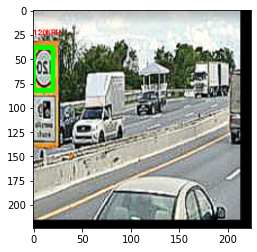

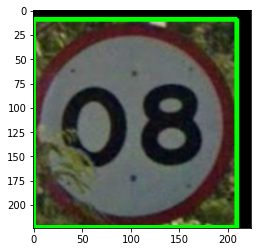

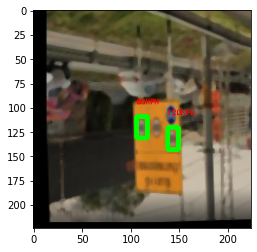

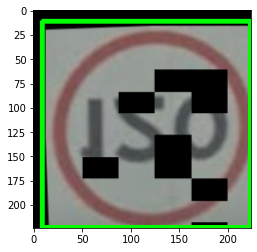

In [ ]:
from axelerate.networks.common_utils.augment import visualize_detection_dataset
visualize_detection_dataset(img_folder='/content/JPEGImages', ann_folder='/content/Annotations', num_imgs=10, img_size=224, augment=True)

In [ ]:
import os
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [ ]:
createFolder('/content/annotations_v/')
createFolder('/content/images_v/')

In [ ]:
import os, random, shutil
files = os.listdir("/content/JPEGImages/")
random.shuffle(files)
files = files[0:400]
for file in files:
    imgSrc = "/content/JPEGImages/" + file
    imgTarget = "/content/images_v/" + file
    annoSrc = "/content/Annotations/" + os.path.splitext(file)[0] + ".xml"
    annoTarget = "/content/annotations_v/" + os.path.splitext(file)[0] + ".xml"
    shutil.move(imgSrc,imgTarget)
    shutil.move(annoSrc,annoTarget)

In [ ]:
config = {
        "model":{
            "type":                 "Detector",
            "architecture":         "MobileNet7_5",
            "input_size":           224,
            "anchors":              [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828],
            "labels":               ["30KPH", "80KPH","120KPH"],
            "coord_scale" : 		1.0,
            "class_scale" : 		1.0,
            "object_scale" : 		5.0,
            "no_object_scale" : 	1.0
        },
        "weights" : {
            "full":   				"",
            "backend":   		    "imagenet"
        },
        "train" : {
            "actual_epoch":         400,
            "train_image_folder":   "/content/JPEGImages",
            "train_annot_folder":   "/content/Annotations",
            "train_times":          1,
            "valid_image_folder":   "/content/images_v",
            "valid_annot_folder":   "/content/annotations_v",
            "valid_times":          1,
            "valid_metric":         "mAP",
            "batch_size":           16,
            "learning_rate":        0.0004,
            "saved_folder":   		"/content/MODEL",
            "first_trainable_layer": "",
            "augumentation":				False,
            "is_only_detect" : 		False
        },
        "converter" : {
            "type":   				["k210"]
        }
    }

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4423717980320239189
 xla_global_id: -1]

In [ ]:
from keras import backend as K 
K.clear_session()
model_path = setup_training(config_dict=config)

Project folder /content/MODEL is created.
7528448/7513544 [==============================] - 0s 0us/step
/content/aXeleRate/axelerate/networks/common_utils/ncc_linux_x86_64.tar.xz
['30KPH', '80KPH', '120KPH']
10641408/10626956 [==============================] - 0s 0us/step
Successfully loaded imagenet backend weights
Failed to load pre-trained weights for the whole model. It might be because you didn't specify any or the weight file cannot be found
Current training session folder is /content/MODEL/2022-09-10_01-35-20


Model: "yolo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 226, 226, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                 
 conv_dw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9

/content/aXeleRate/axelerate/networks/common_utils/fit.py:129: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  use_multiprocessing = True)


Epoch 1/400
44/44 [==============================] - ETA: 0s - loss: 2.5788

/content/aXeleRate/axelerate/networks/yolo/backend/batch_gen.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return imgs_list, np.array(anns_list)




30KPH 0.0000
80KPH 0.0000
120KPH 0.0000
mAP: 0.0000
Saving model on first epoch irrespective of mAP
Epoch 00000: Learning rate is 0.0001303030303030303.

44/44 [==============================] - 153s 3s/step - loss: 2.5788 - val_loss: 1.8986
Epoch 2/400
44/44 [==============================] - ETA: 0s - loss: 1.4516

30KPH 0.0000
80KPH 0.0000
120KPH 0.0000
mAP: 0.0000
mAP did not improve from 0.
Epoch 00001: Learning rate is 0.0002636363636363637.

44/44 [==============================] - 148s 3s/step - loss: 1.4516 - val_loss: 1.2573
Epoch 3/400
44/44 [==============================] - ETA: 0s - loss: 0.9596

30KPH 0.0000
80KPH 0.0000
120KPH 0.0000
mAP: 0.0000
mAP did not improve from 0.
Epoch 00002: Learning rate is 0.000396969696969697.

44/44 [==============================] - 150s 3s/step - loss: 0.9596 - val_loss: 0.8898
Epoch 4/400
44/44 [==============================] - ETA: 0s - loss: 0.6025

30KPH 0.0000
80KPH 0.0000
120KPH 0.0000
mAP: 0.0000
mAP did not improve from 0.
Ep